# 투표 기반 분류
* 가장 많이 예측된 클래스를 정답으로 채택
* 예측되 확률의 가중치 평균

In [16]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [17]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc', model1),('naive', model2),('forest', model3)],
    voting = 'hard'
)

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()

for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv = 5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.95 (+/- 0.03) [VotingClassifier]


In [19]:
model1 = SVC(probability= True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc', model1),('naive', model2),('forest', model3)],
    voting = 'soft',
    weights = [2,1,2]
)

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()

for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv = 5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.95 (+/- 0.03) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


## 결정 경계 시각화

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [25]:
X = iris.data[:,[0,2]]
y =iris.target

In [29]:
model1 = DecisionTreeClassifier(max_depth = 4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma = .1, kernel= 'rbf', probability= True)
vote_model = VotingClassifier(estimators= [('dt', model1),('knn', model2),('svc', model3)],
                                           voting = 'soft',
                                           weights = [2,1,2])

model1 =model1.fit(X, y)
model2 =model2.fit(X, y)
model3 =model3.fit(X, y)

vote_model = vote_model.fit(X, y)

In [33]:
import numpy as np
x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))

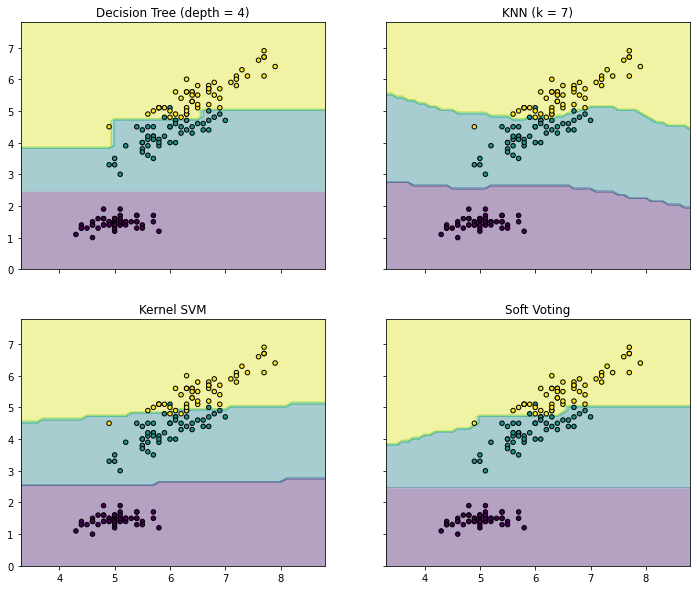

In [36]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(2,2, sharex = 'col', sharey = 'row', figsize = (12,10))
for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2,model3, vote_model],
                          ['Decision Tree (depth = 4)', 'KNN (k = 7)',
                           'Kernel SVM', 'Soft Voting']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx,yy,Z,alpha = 0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0],X[:, 1], c= y, s= 20, edgecolor = 'k')
    axarr[idx[0], idx[1]].set_title(tt)
plt.show()

# 투표 기반 회귀
* 서로 다른 모델의 예측 값의 평균을 사용

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [38]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(estimators= [('linear', model1),('gbr', model2),('rfr', model3)],
                                           weights = [1,1,1])

In [44]:
from sklearn.datasets import load_boston
boston = load_boston()
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, boston.data, boston.target, cv = 5)
  print('R2: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.69 (+/- 0.15) [GradientBoostingRegressor]
R2: 0.62 (+/- 0.21) [RandomForestRegressor]
R2: 0.66 (+/- 0.20) [VotingRegressor]


## 회귀식 시각화

In [45]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [47]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('linear', model1),('gbr', model2),('rfr', model3)],
                                           weights = [1,1,1]
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)

vote_model = vote_model.fit(X, y)

In [56]:
import numpy as np
x_min, x_max = X.min()-1, X.max()+1 
xx = np.arange(x_min, x_max, 0.1)

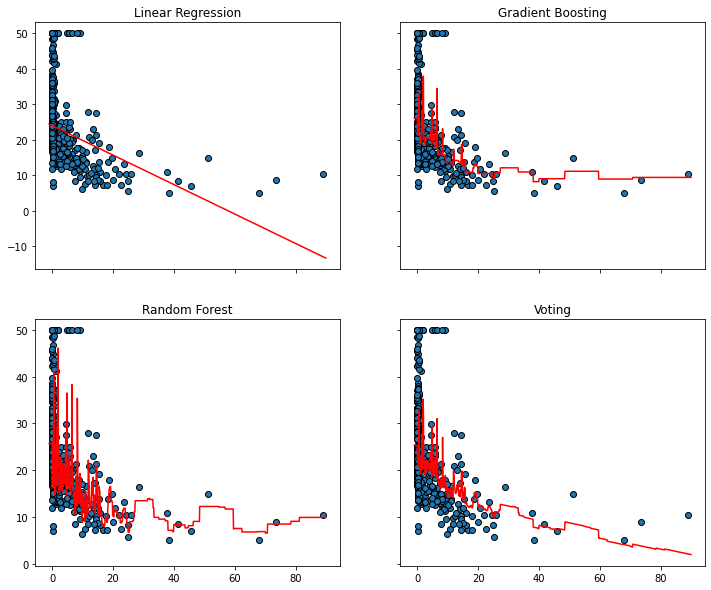

In [60]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(2,2, sharex = 'col', sharey = 'row', figsize = (12,10))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2,model3, vote_model],
                          ['Linear Regression', 'Gradient Boosting',
                           'Random Forest', 'Voting']):
  Z = model.predict(xx.reshape(-1,1))
  axarr[idx[0], idx[1]].plot(xx,Z,c = 'r')
  axarr[idx[0], idx[1]].scatter(X, y, edgecolor = 'k')
  axarr[idx[0], idx[1]].set_title(tt)
plt.show()

# 스택 일반화
* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편행을 줄이는데 효과적

## 스택 회귀

In [62]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [63]:
estimators = [('ridge', Ridge()),('lasso',Lasso()),('svr', SVR())]

In [69]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
    )
)

In [75]:
from sklearn.model_selection import cross_validate
cross_val = cross_validate(
    estimator = reg,
    X =boston.data, y = boston.target,
    cv = 5
)


In [76]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()

reg = StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
    )


model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)

reg = reg.fit(X, y)

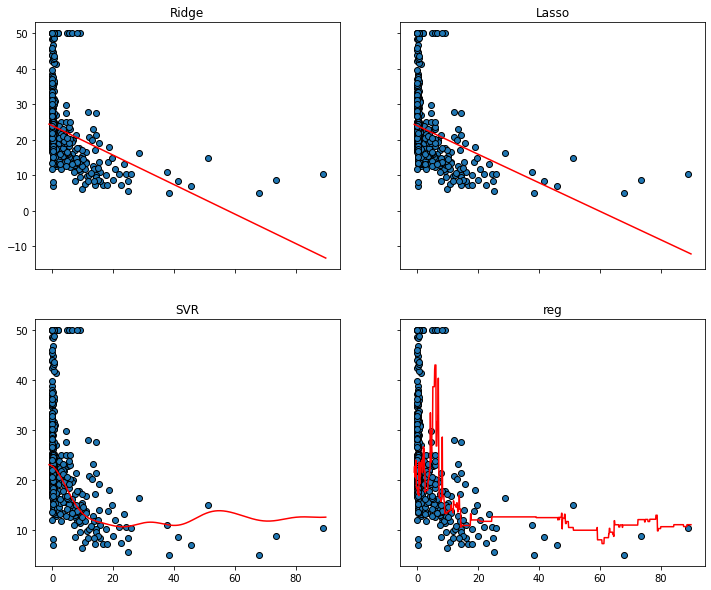

In [78]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(2,2, sharex = 'col', sharey = 'row', figsize = (12,10))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2,model3, reg],
                          ['Ridge', 'Lasso',
                           'SVR', 'reg']):
  Z = model.predict(xx.reshape(-1,1))
  axarr[idx[0], idx[1]].plot(xx,Z,c = 'r')
  axarr[idx[0], idx[1]].scatter(X, y, edgecolor = 'k')
  axarr[idx[0], idx[1]].set_title(tt)
plt.show()

## 스택 분류

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [81]:
estimators = [('logistic', LogisticRegression(max_iter = 10000)), 
              ('svc', SVC()),
              ('naive', GaussianNB())]

In [84]:
clf = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)

In [87]:
cross_val = cross_validate(
    estimator = clf,
    X = iris.data, y =iris.target,
    cv = 5
)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.33866171836853026 (+/- 0.016370711437316398)
avg score time : 0.01106715202331543 (+/- 0.00013071192870558302)
avg test score : 0.9666666666666666 (+/- 0.02108185106778919)


## 결정 경계 시각화

In [94]:
X = iris.data[:,[0,2]]
y =iris.target

In [95]:
model1 = LogisticRegression(max_iter = 10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)

model1 =model1.fit(X, y)
model2 =model2.fit(X, y)
model3 =model3.fit(X, y)

stack = stack.fit(X, y)

In [96]:
import numpy as np
x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))

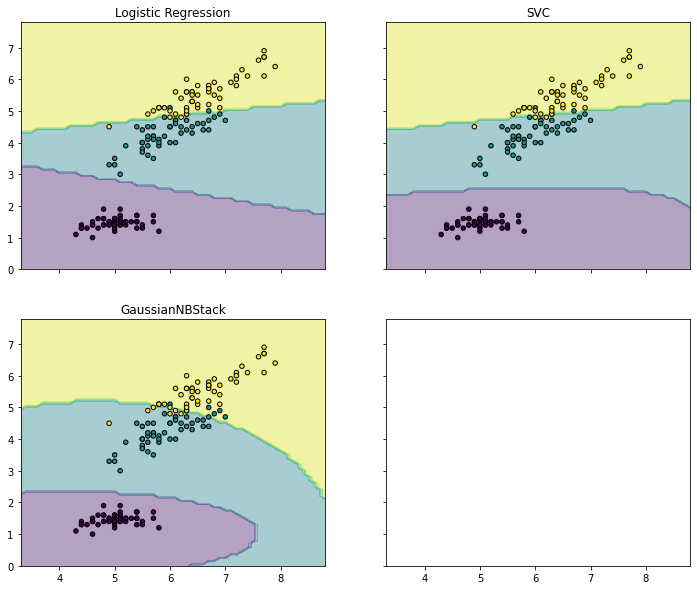

In [97]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(2,2, sharex = 'col', sharey = 'row', figsize = (12,10))
for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2,model3, stack],
                          ['Logistic Regression', 'SVC',
                           'GaussianNB' 'Stack']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx,yy,Z,alpha = 0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0],X[:, 1], c= y, s= 20, edgecolor = 'k')
    axarr[idx[0], idx[1]].set_title(tt)
plt.show()